<a href="https://colab.research.google.com/github/renukaparimi-code/Ai-ml-projects/blob/main/Titanic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Titanic-Dataset[1].csv to Titanic-Dataset[1] (7).csv
✅ Dataset Loaded Successfully!
Shape: (891, 12)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
✅ Missing values filled!
✅ Encoding complete!
✅ Normalization done!


/tmp/ipython-input-1278758956.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1278758956.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

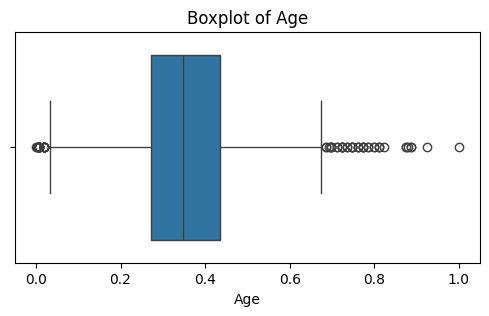

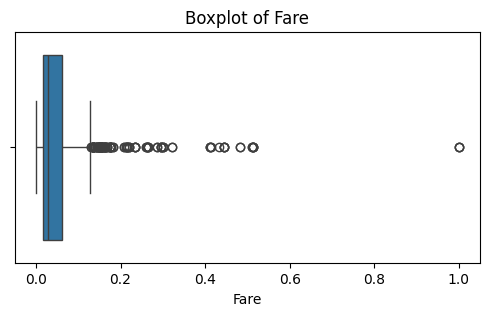

✅ Outliers removed!
New shape: (718, 18)
💾 Cleaned dataset saved as 'Titanic-Dataset[1] (3).csv'
📊 COMPARISON: Before vs After Cleaning

Shape Before Cleaning: (718, 18)
Shape After Cleaning: (718, 18)


Missing Values Before Cleaning:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
Deck_B         0
Deck_C         0
Deck_D         0
Deck_E         0
Deck_F         0
Deck_G         0
Deck_T         0
Deck_U         0
dtype: int64

Missing Values After Cleaning:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
Deck_B         0
Deck_C         0
Deck_D         0
Deck_E         0
Deck_F         0
Deck_G         0
Deck_T         0
Deck_U         0
dtype: int64


📈 Statistical Summary Before Cleaning:

       PassengerId    Survived      Pclass        

In [10]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df = pd.read_csv("Titanic-Dataset[1].csv")

# Display info
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
df.head()
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Deck'] = df['Cabin'].astype(str).str[0].replace('n', 'U')

print("✅ Missing values filled!")
df.isnull().sum()
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # female=0, male=1

df = pd.get_dummies(df, columns=['Embarked', 'Deck'], drop_first=True)
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

print("✅ Encoding complete!")
df.head()
scaler = MinMaxScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Normalization done!")
df[num_cols].head()
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df

for col in ['Age', 'Fare']:
    df = remove_outliers(df, col)

print("✅ Outliers removed!")
print("New shape:", df.shape)
df.to_csv("Titanic-Dataset[1] (3).csv", index=False)
print("💾 Cleaned dataset saved as 'Titanic-Dataset[1] (3).csv'")

# Keep a copy of the original dataset for comparison
original_df = df.copy()
# Compare before vs after cleaning
print("📊 COMPARISON: Before vs After Cleaning\n")

# Shape comparison
print("Shape Before Cleaning:", original_df.shape)
print("Shape After Cleaning:", df.shape)
print("\n")

# Missing value comparison
print("Missing Values Before Cleaning:\n", original_df.isnull().sum())
print("\nMissing Values After Cleaning:\n", df.isnull().sum())
print("\n")

# Numeric summary comparison
print("📈 Statistical Summary Before Cleaning:\n")
print(original_df.describe())

print("\n📉 Statistical Summary After Cleaning:\n")
print(df.describe())
